In [1]:
import sys
import warnings
warnings.filterwarnings(action='ignore')
import collections
from IPython.display import display
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager, rc
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split

mpl.rcParams['axes.unicode_minus'] = False
font_fname = '/Users/seongdae/Library/Fonts/NanumGothicLight.ttf'
font_name = font_manager.FontProperties(fname=font_fname).get_name()

rc('font', family=font_name)
# size, family
print ('font size : '+str(plt.rcParams['font.size']) )
print ('font family : '+str(plt.rcParams['font.family']) )
# import default setting
print('python version : {0}\npandas version : {1}\nmatplotlib version : {2}\nnumpy version : {3}\n'
.format(sys.version, pd.__version__, mpl.__version__, np.__version__))

font size : 10.0
font family : ['NanumGothic']
python version : 3.7.6 (v3.7.6:43364a7ae0, Dec 18 2019, 14:18:50) 
[Clang 6.0 (clang-600.0.57)]
pandas version : 0.25.3
matplotlib version : 3.1.2
numpy version : 1.18.1



# 다층 퍼셉트론(MultiLayer Perceptrons, MLP)

In [ ]:
# 다층 퍼셉트론은 기본 피드포워드(feed-forward) 신경망, 또는 종종 그냥 신경망이라고도 함
    # 또는 입력, 출력, 은닉층의 유닛들이 모두 연결되어 있어서, 완전 연결 신경망(fully connected neural networks)라고도 함

## 신경망 모델

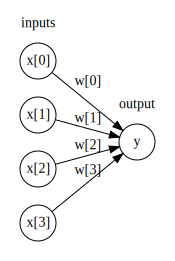

In [4]:
# MLP는 여러 단계를 거쳐 결정을 만들어내는 선형모델의 일반화된 모습이라고 볼 수 있음
display(mglearn.plots.plot_logistic_regression_graph())
# 입력 특성과 예측은 노드(node_원)로, 계수는 노드 사이의 연결로 나타낸 로지스틱 회귀
    # 왼쪽 노드는 입력 특성을 나타내며, 연결선은 학습된 계수를 나타냄(w가중치는 나타내나, b편향은 나타내지 않는 그림도 많음)
    # 오른쪽 노드는 입력의 가중치합, 즉 출력을 나타냄

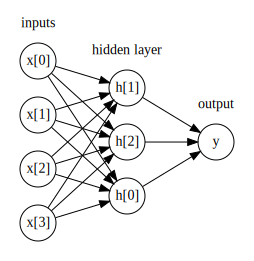

In [6]:
# MLP에서는 가중치 합을 만드는 과정이 여러번 반복되며, 먼저 중간 단계를 구성하는 은닉 유닛(hidden unit)을 계산
# 이를 이용하여 최종 결과를 산출하기 위해 다시 가중치 합을 계산함
display(mglearn.plots.plot_single_hidden_layer_graph())

In [9]:
# 이런 모델은 많은 계수(또는 가중치)를 학습해야함
# 이 계수는 각 입력과 은닉층(hidden layer)의 은닉 유닛 사이, 그리고 각 은닉 유닛과 출력 사이마다 존재함
    # 위의 그림에선, 입력과 은닉층 사이의 12개의 계수, 은닉층의 각 은닉 유닛과 출력 사이의 3개의 계수, 총 15개의 계수가 존재함
    
# 그러나, 여러 개의 가중치 합을 계산하는 것은 수학적으로 하나의 가중치 합을 계산하는 것과 같음
    # x[0]이 w[0] 하나의 가중치와 곱해져 출력으로 전달되는 것과 은닉 유닛을 거쳐 다시 출력으로 가중치 합을 하는 것은
    # x[0]에 대해 가중치 변수를 정리하면 결국 동일한 식으로 표현됨
    # 즉, 단순 선형 함수만을 사용하는 것은 하나의 가중치를 여러개로 분할하는 역할만 할 뿐임

# 그래서 이러한 모델을 선형 모델보다 강력하게 만들려면 기교가 필요함
# 각 은닉 유닛의 가중치 합을 계산한 후 그 결과에 비선형 함수인 렐루(ReLU, rectified linear unit)나
# 하이퍼볼릭 탄젠트(hyperbolic tangent, tanh) 를 적용함
    # 이러한 함수들을 활성화 함수(activation function)이라하며, 렐루와 하이퍼볼릭탄젠트 외에도 시그모이드 함수도 존재함
    # 시그모이드는 로지스틱 함수로도 불리며, 1/(1+e)^(-z) 의 수식을 가지며, z는 유닛의 출력값임
    # scikit-learn은 위의 세 활성화 함수를 모두 지원
# 이 활성화 함수의 결과의 가중치 합을 계산하여, 출력값을 만듬

Text(0, 0.5, 'Relu(x), tanh(x)')

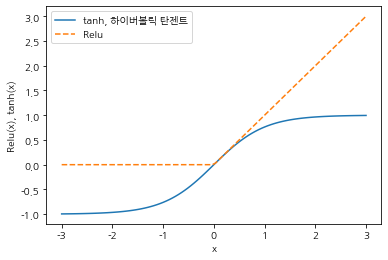

In [17]:
line = np.linspace(-3,3,100)
plt.plot(line, np.tanh(line), label='tanh, 하이버볼릭 탄젠트')
plt.plot(line, np.maximum(line, 0), linestyle='--', label='Relu')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('Relu(x), tanh(x)')

# Relu는 0이하의 값을 모두 잘라버리고, tanh함수는 낮은 입력값에 대해선 -1에 수렴하게끔 하고, 높은 입력값에 대해선 1로 수렴하게끔 함
# 이런 비선형 함수를 이용해 신경망이 선형 모델에서 보다 더 복잡한 함수를 학습 할 수있음

# 보통 분류의 경우, 신경망 마지막 출력층에 시그모이드(이진분류)나, 소프트맥스(다중분류)함수를 적용하여 출력값을 계산함
    # 소프트맥스는 여러 유닛의 출력값을 정규화하기 위한것으로, 수식은 e^z(i) / ∑(i=1, k)e^z(i) 로 나타내며
        # z는 각 유닛의 출력값이고, k는 유닛 갯수임

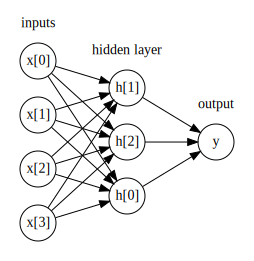

In [18]:
display(mglearn.plots.plot_single_hidden_layer_graph())

# 아래의 그래프에서 tanh 비선형 함수를 사용해서 회귀 분석 할 때, 출력을 계산하는 전체 공식은 다음과 같음
# h[0] = tanh(w[0,0]*x[0] + w[1,0]*x[1] + w[2,0]*x[2] + w[3,0]*x[3] + b[0])
# h[1] = tanh(w[0,1]*x[0] + w[1,1]*x[1] + w[2,1]*x[2] + w[3,1]*x[3] + b[1])
# h[2] = tanh(w[0,2]*x[0] + w[1,2]*x[1] + w[2,2]*x[2] + w[3,2]*x[3] + b[2])
# 출력  = v[0]*h[0] + v[1]*h[1] + v[2]*h[2] + b
    
    # w는 입력 x와 은닉층 h 사이의 가중치, v는 은닉층 h와 출력 사이의 가중치
    # v와 w는 훈련 데이터에서 학습하고, x는 입력 특성이며, 출력값은 출력될 뿐이고, h는 중간 계산값임
    # 우리가 정해야 하는 중요 매개변수는 은닉층의 유닛개수, 혹은 은닉층의 갯수이다

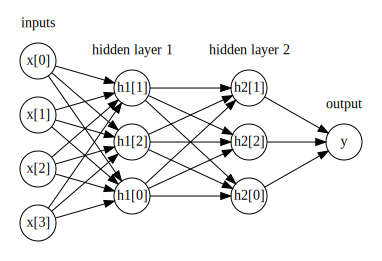

In [19]:
display(mglearn.plots.plot_two_hidden_layer_graph())
# 아래 그림처럼 은닉층을 추가할 수도 있다

In [20]:
# 이와 같이 많은 은닉층으로 구성된, 대규모의 신경망이 생기면서 이를 딥러닝이라고 부르게됨

## 신경망 튜닝